## Import

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

## Read preprocessed CSV into dataframe

In [11]:
locations = pd.read_csv('data/processed/c101.csv')
locations.head()

Unnamed: 0  CustomerNO   Lng   Lat  Demand  ReadyTime     Due  ServiceTime
0           0           1  40.0  50.0     0.0        0.0  1236.0          0.0
1           1           2  45.0  68.0    10.0      912.0   967.0         90.0
2           2           3  45.0  70.0    30.0      825.0   870.0         90.0
3           3           4  42.0  66.0    10.0       65.0   146.0         90.0
4           4           5  42.0  68.0    10.0      727.0   782.0         90.0

## Plot locations
### Remove depot from locations to plot it as an own point

In [12]:
depot = locations.iloc[0]

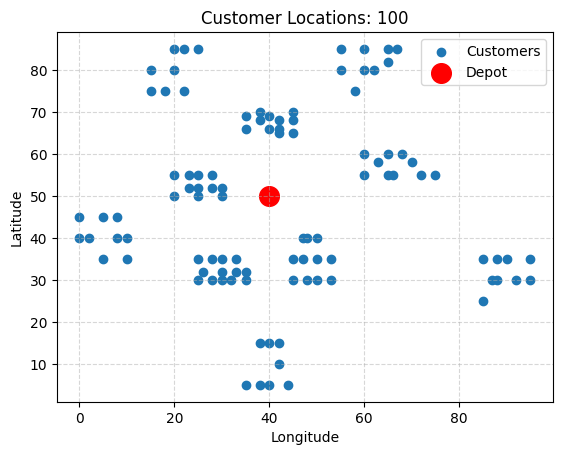

In [13]:
plt.title(f'Customer Locations: {len(locations) - 1}')
plt.scatter(locations.iloc[1:]['Lng'], locations.iloc[1:]['Lat'])
plt.scatter(depot['Lng'], depot['Lat'], color='red', s=200)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['Customers', 'Depot'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

## Run ACO algorithm

In [35]:
from sia.aco import ACO, ACOParameters

n_locations = len(locations)
alpha = 0.9
beta = 2.0
evaporation_rate = 0.5

n_vehicles = 25
n_iterations = 100
max_capacity = 100

# Initialize parameters and ACO algorithm
aco_params = ACOParameters(n_locations=n_locations, alpha=alpha, beta=beta, evaporation_rate=evaporation_rate)
aco = ACO(locations_df=locations, n_vehicles=n_vehicles, n_iterations=n_iterations, aco_params=aco_params, max_capacity=max_capacity)

# Run ACO
vehicle_solutions, best_distances, time_window_violations, max_customers_visited, total_distances, best_solution_index = aco.run_loop()

______________________________________________ITERATION 1______________________________________________
VEHICLE 1
Visiting customer 43 with current time 0.0, travel time 16.55294535724685, demand 10.0
Arrived on time at 43
Remaining capacity 90.0, unvisited customers: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}
Visiting customer 42 with current time 106.55294535724684, travel time 3.0, demand 20.0
Arrived on time at 42
Remaining capacity 70.0, unvisited customers: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 51

## Print and plot results

Best solution (Index: 22)
Route 1: 20 -> 24 -> 25 -> 27 -> 29 -> 30 -> 45 | Distance travelled: 76.89 | Time window violations: 0
Route 2: 43 -> 42 -> 41 -> 40 -> 44 -> 46 -> 48 | Distance travelled: 105.53 | Time window violations: 1
Route 3: 98 -> 96 -> 95 -> 94 -> 92 -> 91 | Distance travelled: 143.72 | Time window violations: 1
Route 4: 5 -> 3 -> 7 -> 8 -> 10 -> 11 -> 9 -> 26 | Distance travelled: 66.39 | Time window violations: 0
Route 5: 67 -> 65 -> 63 -> 62 -> 69 | Distance travelled: 91.02 | Time window violations: 1
Route 6: 13 -> 17 -> 18 -> 19 -> 72 -> 61 | Distance travelled: 130.97 | Time window violations: 0
Route 7: 90 -> 87 -> 86 -> 83 -> 82 -> 84 -> 77 | Distance travelled: 126.73 | Time window violations: 0
Route 8: 81 -> 78 -> 76 -> 71 -> 73 -> 80 | Distance travelled: 223.35 | Time window violations: 2
Route 9: 6 -> 2 -> 1 -> 75 | Distance travelled: 144.91 | Time window violations: 2
Route 10: 57 -> 55 -> 54 -> 59 | Distance travelled: 133.46 | Time window violatio

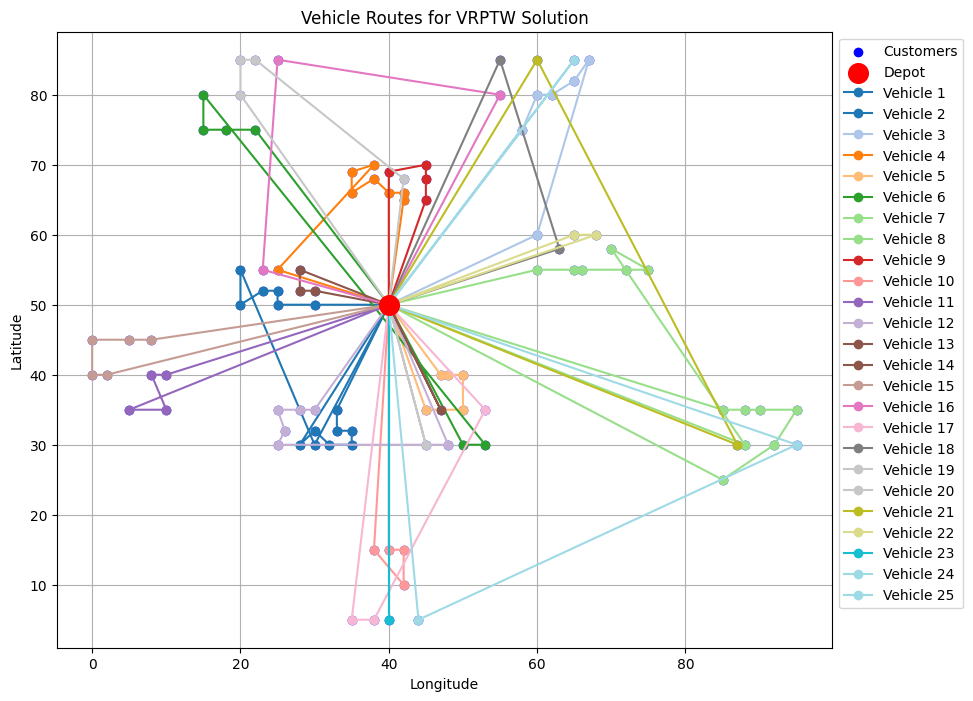

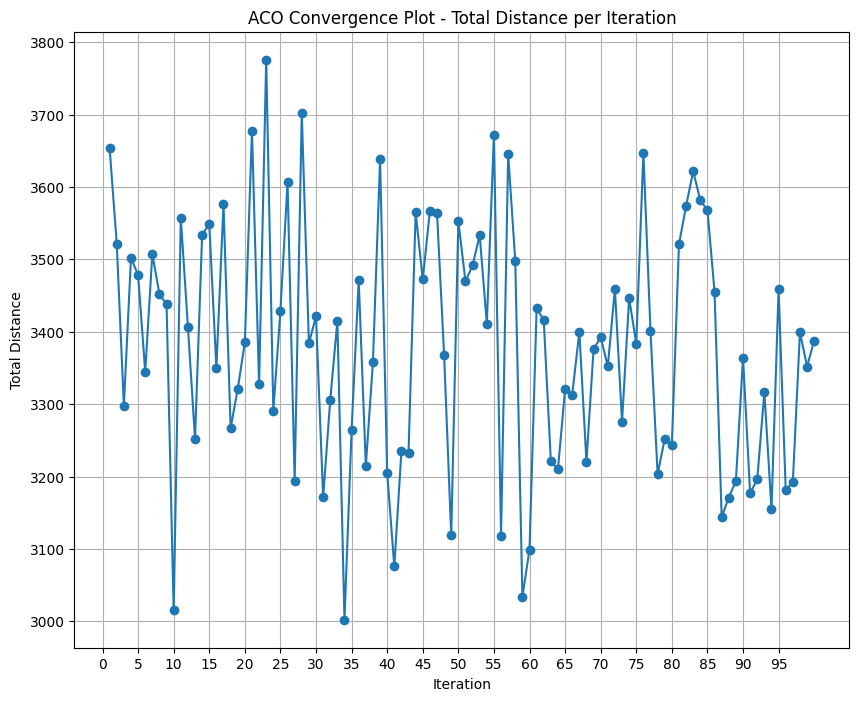

In [36]:
from utils.plotters.solution_visualizer import print_solutions, plot_vehicle_routes, plot_convergence

print_solutions(vehicle_solutions, best_distances, time_window_violations, max_customers_visited, best_solution_index)
plot_vehicle_routes(locations, vehicle_solutions)
plot_convergence(total_distances, n_iterations)

## Run PSO algorithm

In [37]:
from sia.pso import PSO, PSOParameters

n_particles = 10
c1 = 2
c2 = 2
inertia_weight = 0.8

n_vehicles = 19
n_iterations = 100
max_capacity = 90

# Initialize parameters and ACO algorithm
pso_parameters = PSOParameters(n_particles=n_particles, c1=c1, c2=c2, inertia_weight=inertia_weight)
pso = PSO(locations_df=locations, n_vehicles=n_vehicles, n_iterations=n_iterations, pso_parameters=pso_parameters, max_capacity=max_capacity)

# Run ACO
best_position, best_cost = pso.optimize()

print("Best Position (solution):", best_position)
print("Best Cost:", best_cost)

Initialized routes: [[0, 93, 16, 69, 0], [0, 28, 86, 8, 94, 9, 29, 72, 0], [0, 88, 58, 100, 51, 0], [0, 25, 13, 68, 40, 0], [0, 54, 3, 1, 66, 59, 26, 0], [0, 42, 92, 21, 5, 76, 64, 0], [0, 15, 99, 48, 47, 7, 0], [0, 89, 57, 87, 44, 73, 0], [0, 82, 6, 70, 45, 90, 0], [0, 39, 96, 14, 78, 52, 61, 79, 0], [0, 65, 11, 30, 18, 95, 91, 0], [0, 83, 43, 17, 80, 31, 49, 55, 0], [0, 63, 2, 50, 0], [0, 74, 98, 67, 41, 0], [0, 46, 53, 97, 19, 0], [0, 34, 75, 12, 36, 24, 10, 0], [0, 85, 81, 22, 23, 0], [0, 56, 60, 71, 77, 20, 0], [0, 32, 38, 35, 4, 27, 0]]
Initialized routes: [[0, 17, 81, 91, 6, 19, 0], [0, 62, 85, 58, 68, 0], [0, 56, 13, 70, 0], [0, 28, 29, 88, 98, 83, 0], [0, 16, 54, 10, 0], [0, 71, 82, 11, 67, 66, 99, 35, 0], [0, 74, 39, 45, 50, 0], [0, 42, 93, 65, 30, 24, 0], [0, 32, 21, 5, 18, 1, 0], [0, 95, 22, 51, 36, 73, 26, 0], [0, 59, 61, 63, 49, 47, 0], [0, 46, 2, 60, 94, 0], [0, 9, 57, 27, 87, 80, 0], [0, 31, 20, 84, 75, 92, 0], [0, 12, 14, 4, 44, 55, 72, 23, 76, 0], [0, 8, 38, 3, 100, 4

In [38]:
total_len = 0
for i in best_position:
    print(len(i[1:-1]))
    total_len += len(i[1:-1])

print(total_len)

5
3
3
6
4
4
4
7
4
6
6
3
5
7
7
5
3
6
7
95


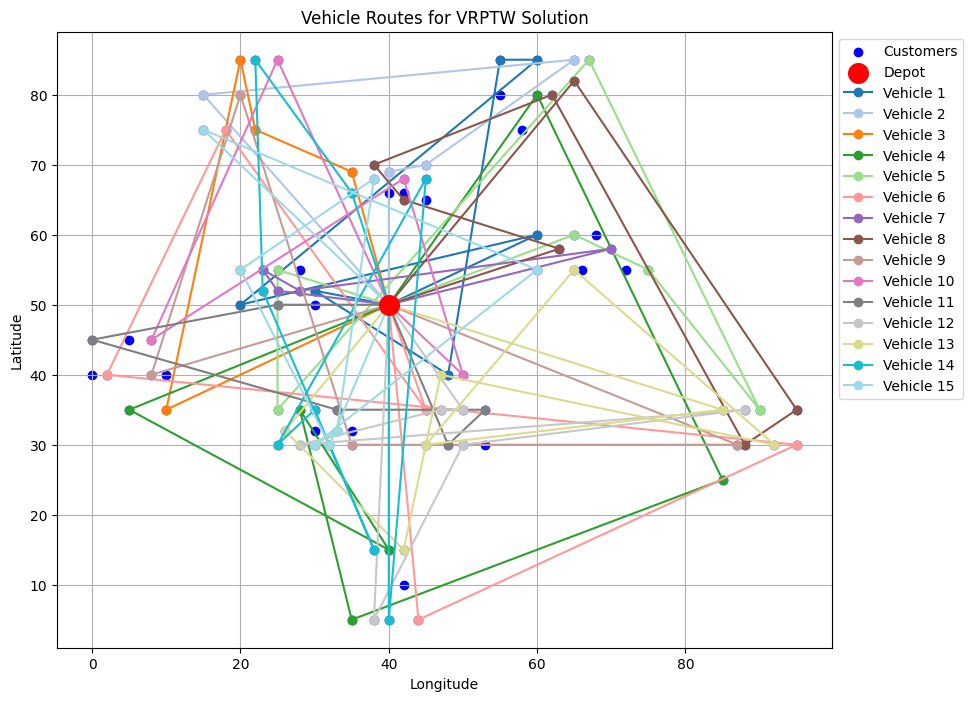

In [18]:
plot_vehicle_routes(locations, best_position)